# 영문 워드 크라우드

In [1]:
#NLTK(Natural Language ToolKit)
import nltk

In [ ]:
# COLAB에서는 접속할때마다 다운 받아야함
# 주피터에서는 1번만 하면 사용가능
nltk.download('punkt')
nltk.download('stopwords')

In [19]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

# 1.stopwords(불용어)처리

In [11]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# wordCloud 에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{'against', "didn't", 'was', "weren't", 'where', 'just', "wasn't", 'from', 'most', "you're", 'am', 'they', "can't", "hadn't", "wouldn't", 'our', 'is', 'like', 'before', 'in', 'over', 'here', 'above', "when's", 'has', 'http', 'once', 'further', 'to', 'having', 'hers', 'off', 'i', "you'll", "hasn't", 'herself', 'myself', 'should', 'however', 'until', "mustn't", 'out', 'very', 'so', 'up', 'this', 'r', "there's", "what's", "why's", 'ourselves', 'into', 'other', 'through', "it's", "we'd", 'also', "haven't", "they'll", "you'd", 'it', 'otherwise', 'theirs', 'them', 'some', "they've", "isn't", 'shall', 'ours', 'therefore', "we've", 'because', 'since', 'by', "aren't", 'ought', "they'd", 'my', 'doing', 'during', 'could', 'their', 'too', 'the', 'k', 'if', "he's", 'only', 'when', 'while', 'hence', 'whom', "who's", 'each', 'ever', 'yours', 'what', 'a', "she'll", 'does', 'and', 'do', 'its', 'no', 'both', 'would', 'such', "shouldn't", 'than', 'been', 'get', 'being', 'few', 'nor', 'her', 'are', 'or', 

In [13]:
print(len(sw_nltk), len(sw_wc))

179 192


# 2. 이상한나라엘리스 분석

In [14]:
with open('./Alice.txt') as file:
  text = file.read()

In [16]:
# 'said' 단어를 불용어 처리 추가
sw_wc.add('said')

In [26]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc)
wc = wc.generate(text)
print(wc)

In [27]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


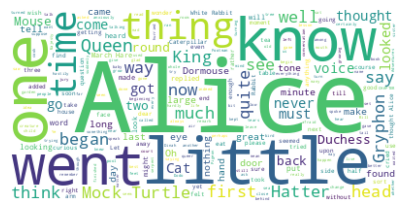

In [25]:
plt.figure(figsize=(5, 3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 그림위에 표시하기

In [33]:
mask = np.array(Image.open('./Alice_mask.png'))

In [39]:
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


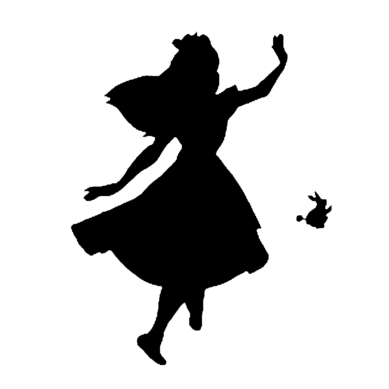

In [40]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc, mask=mask).generate(text)

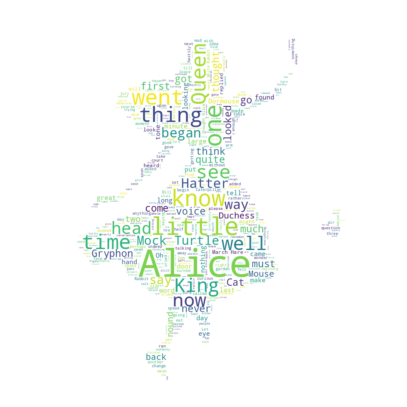

In [36]:
plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()